In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("loan.csv")

In [4]:
dataset.head(3)

,loan_id,Gender,Married,Dependents,Education,self_employed,applicantincome,coapplicant_income,loan_amount,property
0,12.0,male,no,0.0,graduate,no,453453.0,0,232,urban
1,34.0,female,yes,1.0,NaN,yes,5435.0,3434,232,rural
2,5.0,male,NaN,2.0,ungraduate,NaN,4545.0,3,32,rural


In [5]:
dataset.isnull().sum()

loan_id               1
Gender                3
Married               3
Dependents            3
Education             5
self_employed         3
applicantincome       4
coapplicant_income    0
loan_amount           0
property              0
dtype: int64

In [8]:
dataset.fillna({"applicantincome":dataset["applicantincome"].mode()[0] },inplace=True)

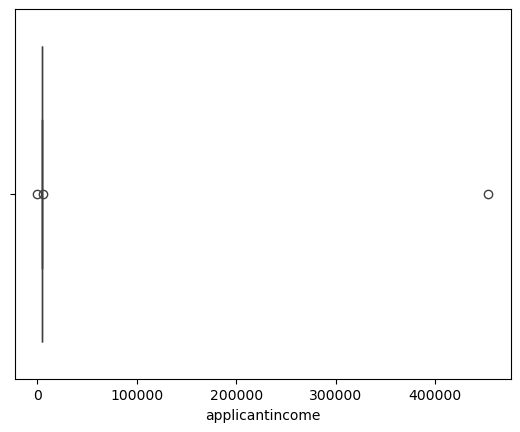

In [9]:
sns.boxplot(x="applicantincome",data=dataset)
plt.show()

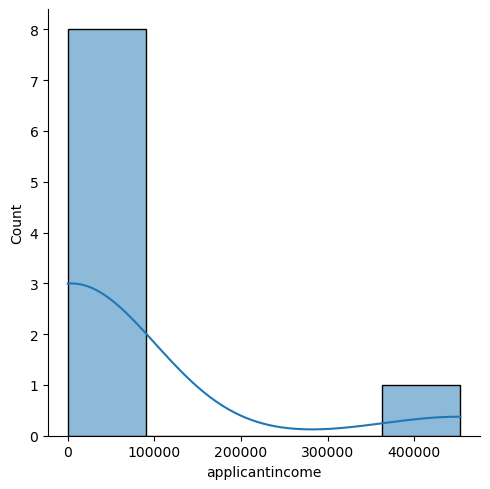

In [67]:
sns.displot(dataset["applicantincome"],kde=True)

In [12]:
from sklearn.preprocessing import StandarScaler 

In [13]:
ss=StandardScaler()

In [14]:
ss.fit(dataset[["applicantincome"]])

StandardScaler()

In [16]:
arr_database=ss.transform(dataset[["applicantincome"]])

In [19]:
dataset["applicantincome_ss"]=pd.DataFrame(arr_database,columns=["x"])

In [20]:
dataset


,loan_id,Gender,Married,Dependents,Education,self_employed,applicantincome,coapplicant_income,loan_amount,property,applicantincome_ss
0,12.0,male,no,0.0,graduate,no,453453.0,0,232,urban,2.828272
1,34.0,female,yes,1.0,NaN,yes,5435.0,3434,232,rural,-0.344001
2,5.0,male,NaN,2.0,ungraduate,NaN,4545.0,3,32,rural,-0.350302
3,65.0,NaN,no,NaN,NaN,no,4545.0,3434,2,urban,-0.350302
4,767.0,female,yes,2.0,graduate,NaN,4545.0,3445,323,rural,-0.350302
5,8.0,NaN,NaN,NaN,NaN,yes,4545.0,454,2,urban,-0.350302
6,78.0,female,NaN,1.0,ungraduate,NaN,4545.0,343,32,rural,-0.350302
7,NaN,male,yes,0.0,NaN,yes,4545.0,23223,32,urban,-0.350302
8,89.0,NaN,no,NaN,NaN,no,4.0,323,323,rural,-0.382456


In [21]:
dataset.describe()

,loan_id,Dependents,applicantincome,coapplicant_income,loan_amount,applicantincome_ss
count,8.000000,6.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,132.250000,1.000000,54018.000000,3851.000000,134.444444,1.850372e-17
std,258.564029,0.894427,149796.364143,7430.652394,139.959022,1.060660e+00
min,5.000000,0.000000,4.000000,0.000000,2.000000,-3.824559e-01
25%,11.000000,0.250000,4545.000000,323.000000,32.000000,-3.503025e-01
50%,49.500000,1.000000,4545.000000,454.000000,32.000000,-3.503025e-01
75%,80.750000,1.750000,4545.000000,3434.000000,232.000000,-3.503025e-01
max,767.000000,2.000000,453453.000000,23223.000000,323.000000,2.828272e+00


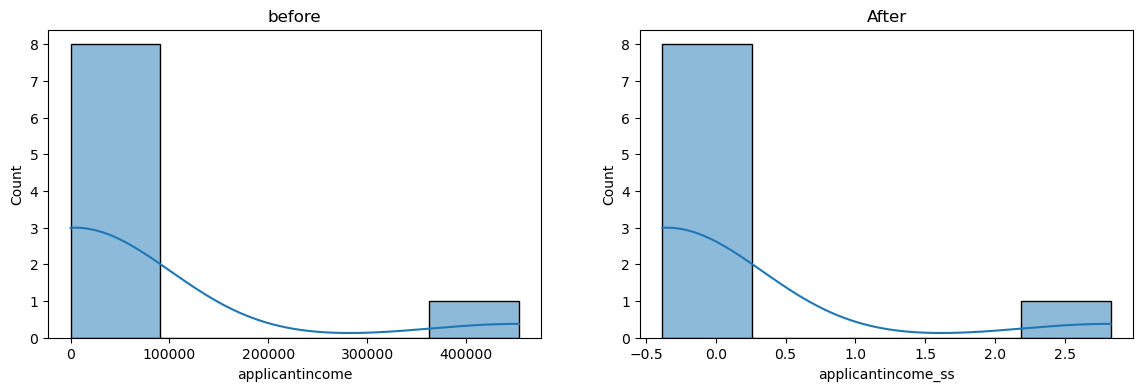

In [68]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("before")
sns.histplot(dataset["applicantincome"],kde=True )

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(dataset["applicantincome_ss"],kde=True)
plt.show()
